In [32]:
#Import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Datasets
df = pd.read_csv('vgsales.csv',index_col=0)
df.set_index('name',inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54226 entries, Wii Sports to Zoo Tycoon: Ultimate Animal Collection
Data columns (total 13 columns):
rank              54226 non-null int64
release_date      51870 non-null object
platform          54226 non-null object
publisher         54226 non-null object
developer         54211 non-null object
NA_Sales          13448 non-null object
PAL_Sales         13936 non-null object
JP_Sales          7589 non-null object
Other_Sales       16143 non-null object
Global_Sales      20053 non-null object
vgchartz_score    738 non-null float64
critic_score      6391 non-null float64
user_score        302 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 5.8+ MB


In [4]:
#clean up date by converting from string to numerical values
df.head()

,rank,release_date,platform,publisher,developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,vgchartz_score,critic_score,user_score
name,,,,,,,,,,,,,
Wii Sports,1,19th Nov 06,Wii,Nintendo,Nintendo EAD,41.36m,29.02m,3.77m,8.51m,82.65m,NaN,7.7,NaN
Super Mario Bros.,2,18th Oct 85,NES,Nintendo,Nintendo EAD,29.08m,3.58m,6.81m,0.77m,40.24m,NaN,10.0,NaN
Mario Kart Wii,3,27th Apr 08,Wii,Nintendo,Nintendo EAD,15.84m,12.92m,3.80m,3.34m,35.90m,8.7,8.2,9.1
Wii Sports Resort,4,26th Jul 09,Wii,Nintendo,Nintendo EAD,15.61m,10.98m,3.29m,3.02m,32.90m,8.8,8.0,8.8
Pokémon Red / Green / Blue Version,5,30th Sep 98,GB,Nintendo,Game Freak,11.27m,8.89m,10.22m,1.00m,31.37m,NaN,9.4,NaN


In [5]:
from datetime import datetime

def convert_str_to_date(str_date):
    try:
        list_date = str_date.split(" ")
        day = list_date[0][:2]
        month = list_date[1]
        year = list_date[2]

        century19 = "19"
        century20 = "20"

        if int(year) <= 30:
            century20 += year
            year = century20
        else:
            century19 += year
            year = century19

        return datetime.strptime(' '.join([day,month,year]), '%d %b %Y').date()
    except:
        return None

In [6]:
df["release_date"] = df["release_date"].apply(lambda x: convert_str_to_date(x))

In [7]:
def sales_data_converter(str_sales):
    try:
        scaler = str_sales[-1] 
        if scaler == "m":
            num_list = str_sales[:-1].split(".")
            before_decimal = int(num_list[0])*1000000
            after_decimal = int(num_list[1])*10000
            return before_decimal + after_decimal
    except:
        return None

In [8]:
df["JP_Sales"] = df["JP_Sales"].apply(sales_data_converter)
df["NA_Sales"] = df["NA_Sales"].apply(sales_data_converter)
df["PAL_Sales"] = df["PAL_Sales"].apply(sales_data_converter)
df["Other_Sales"] = df["Other_Sales"].apply(sales_data_converter)
df["Global_Sales"] = df["Global_Sales"].apply(sales_data_converter)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54226 entries, Wii Sports to Zoo Tycoon: Ultimate Animal Collection
Data columns (total 13 columns):
rank              54226 non-null int64
release_date      51870 non-null object
platform          54226 non-null object
publisher         54226 non-null object
developer         54211 non-null object
NA_Sales          13448 non-null float64
PAL_Sales         13936 non-null float64
JP_Sales          7589 non-null float64
Other_Sales       16143 non-null float64
Global_Sales      20053 non-null float64
vgchartz_score    738 non-null float64
critic_score      6391 non-null float64
user_score        302 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 5.8+ MB


In [10]:
#To do
#check num of titles by console / publisher by year
#check popular company
#check popular consoles over the year to predict when PS5 would come?
#check type of consoles
#check popular publisher

In [11]:
df['year'] = df["release_date"].apply(lambda x: x.year if x != None else None)
df['month'] = df["release_date"].apply(lambda x: x.month if x != None else None)

In [12]:
new = df[df['year'] >= 2010]

In [13]:
temp = new.groupby(['year','platform']).count()

In [14]:
temp = pd.DataFrame(temp["rank"])

In [15]:
check = pd.pivot_table(temp, values='rank', index=['year'], columns=['platform'], aggfunc="sum")

In [16]:
for_plot = check[["Wii","WiiU","3DS","NS","PS2","PS3","PS4","PSV","X360","XOne","XBL","OSX","PC"]]
for_plot = for_plot.fillna(0)
for_plot = for_plot[for_plot.index <= 2018]

<Figure size 720x720 with 0 Axes>

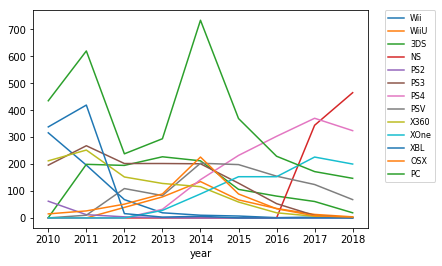

In [17]:
# look into popular consoles over years
# this map graph is a bit mess
plt.figure(figsize=(10,10)); 
for_plot.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

<Figure size 720x720 with 0 Axes>

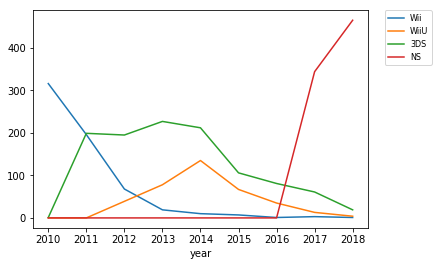

In [18]:
# look into Nintendo console 
nintendo = for_plot[["Wii","WiiU","3DS","NS"]]
plt.figure(figsize=(10,10)); 
nintendo.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

<Figure size 720x720 with 0 Axes>

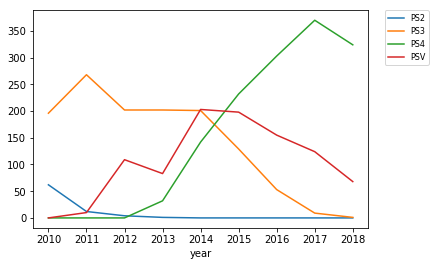

In [19]:
# look into Sony devices
# it's time to release new console, isnt it?
sony = for_plot[["PS2","PS3","PS4","PSV"]]
plt.figure(figsize=(10,10)); 
sony.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

<Figure size 720x720 with 0 Axes>

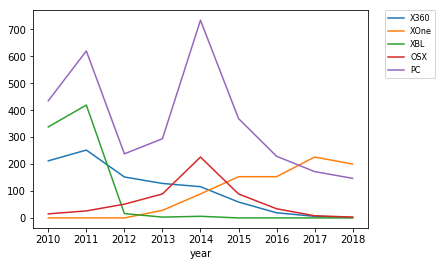

In [20]:
# also, Xbox series has been declining, and they might want a new console!
other = for_plot[["X360","XOne","XBL","OSX","PC"]]
plt.figure(figsize=(10,10)); 
other.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

<Figure size 720x720 with 0 Axes>

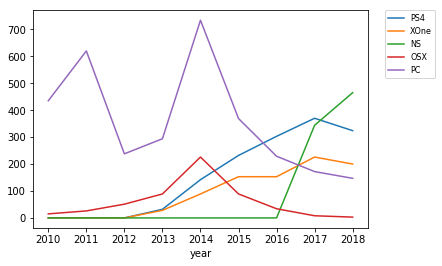

In [21]:
#NS wont the conpetition
pop = for_plot[["PS4","XOne","NS","OSX","PC"]]
plt.figure(figsize=(10,10)); 
pop.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

In [22]:
df.head()

,rank,release_date,platform,publisher,developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,vgchartz_score,critic_score,user_score,year,month
name,,,,,,,,,,,,,,,
Wii Sports,1,2006-11-19,Wii,Nintendo,Nintendo EAD,41360000.0,29020000.0,3770000.0,8510000.0,82650000.0,NaN,7.7,NaN,2006.0,11.0
Super Mario Bros.,2,1985-10-18,NES,Nintendo,Nintendo EAD,29080000.0,3580000.0,6810000.0,770000.0,40240000.0,NaN,10.0,NaN,1985.0,10.0
Mario Kart Wii,3,2008-04-27,Wii,Nintendo,Nintendo EAD,15840000.0,12920000.0,3800000.0,3340000.0,35900000.0,8.7,8.2,9.1,2008.0,4.0
Wii Sports Resort,4,2009-07-26,Wii,Nintendo,Nintendo EAD,15610000.0,10980000.0,3290000.0,3020000.0,32900000.0,8.8,8.0,8.8,2009.0,7.0
Pokémon Red / Green / Blue Version,5,1998-09-30,GB,Nintendo,Game Freak,11270000.0,8890000.0,10220000.0,1000000.0,31370000.0,NaN,9.4,NaN,1998.0,9.0


In [23]:
developers = pd.DataFrame(df.groupby("developer").count()["rank"])

In [24]:
developers["Total_Sales"] = df.groupby("developer").sum()["Global_Sales"]

In [25]:
developers["JP_Sales"] = df.groupby("developer").sum()["JP_Sales"]

In [26]:
developers["perTitle"] = developers.apply(lambda x: x["Total_Sales"] / x["rank"],axis=1)

In [27]:
developers["JPperTitle"] = developers.apply(lambda x: x["Total_Sales"] / x["rank"],axis=1)

In [33]:
# Top 10 video game producers in terms of per-title sales. 
# This per titles sales might imply their performance of selling good titles
developers.sort_values(by="perTitle",ascending=False).head(10)

,rank,Total_Sales,JP_Sales,perTitle,JPperTitle
developer,,,,,
Good Science Studio,1,22100000.0,240000.0,2.210000e+07,2.210000e+07
Nintendo EAD / Retro Studios,1,14950000.0,2960000.0,1.495000e+07,1.495000e+07
Project Sora,2,14190000.0,3040000.0,7.095000e+06,7.095000e+06
Game Freak,37,225280000.0,69880000.0,6.088649e+06,6.088649e+06
Nintendo SDD,6,35960000.0,9990000.0,5.993333e+06,5.993333e+06
Sledgehammer Games,6,32570000.0,550000.0,5.428333e+06,5.428333e+06
Nintendo EAD,138,716040000.0,126530000.0,5.188696e+06,5.188696e+06
Pumpkin Studios,1,5010000.0,0.0,5.010000e+06,5.010000e+06
Mojang,6,26410000.0,350000.0,4.401667e+06,4.401667e+06


In [34]:
developers.sort_values(by="rank",ascending=False).head(5)

,rank,Total_Sales,JP_Sales,perTitle,JPperTitle
developer,,,,,
Unknown,5292,103030000.0,37690000.0,19469.009826,19469.009826
Konami,881,117280000.0,41760000.0,133121.452894,133121.452894
Sega,800,67370000.0,23660000.0,84212.500000,84212.500000
Capcom,662,198470000.0,79710000.0,299803.625378,299803.625378
Namco,425,102840000.0,36510000.0,241976.470588,241976.470588


In [35]:
developers.sort_values(by="JPperTitle",ascending=False).head(5)

,rank,Total_Sales,JP_Sales,perTitle,JPperTitle
developer,,,,,
Good Science Studio,1,22100000.0,240000.0,2.210000e+07,2.210000e+07
Nintendo EAD / Retro Studios,1,14950000.0,2960000.0,1.495000e+07,1.495000e+07
Project Sora,2,14190000.0,3040000.0,7.095000e+06,7.095000e+06
Game Freak,37,225280000.0,69880000.0,6.088649e+06,6.088649e+06
Nintendo SDD,6,35960000.0,9990000.0,5.993333e+06,5.993333e+06


In [31]:
df[df["developer"]=="Good Science Studio"]

,rank,release_date,platform,publisher,developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,vgchartz_score,critic_score,user_score,year,month
name,,,,,,,,,,,,,,,
Kinect Adventures!,15,2010-11-04,X360,Microsoft Game Studios,Good Science Studio,15090000.0,4970000.0,240000.0,1810000.0,22100000.0,6.2,6.7,NaN,2010.0,11.0


In [38]:
# Overall Sales ranking by developers, estimated based on total sales
developers.sort_values(by="Total_Sales",ascending=False).head(5)

,rank,Total_Sales,JP_Sales,perTitle,JPperTitle
developer,,,,,
Nintendo EAD,138,716040000.0,126530000.0,5.188696e+06,5.188696e+06
EA Canada,377,274480000.0,2850000.0,7.280637e+05,7.280637e+05
Game Freak,37,225280000.0,69880000.0,6.088649e+06,6.088649e+06
Capcom,662,198470000.0,79710000.0,2.998036e+05,2.998036e+05
EA Tiburon,231,182040000.0,90000.0,7.880519e+05,7.880519e+05


In [58]:
df[df["platform"]== "PS4"].sort_values(by="JP_Sales",ascending= False).head(10)

,rank,release_date,platform,publisher,developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,vgchartz_score,critic_score,user_score,year,month
name,,,,,,,,,,,,,,,
Monster Hunter: World,287,2018-01-26,PS4,Capcom,Capcom,840000.0,970000.0,2150000.0,360000.0,4330000.0,NaN,9.3,9.0,2018.0,1.0
Dragon Quest XI: Echoes of an Elusive Age,1265,2018-09-04,PS4,Square Enix,Square Enix,50000.0,80000.0,1430000.0,20000.0,1570000.0,NaN,10.0,NaN,2018.0,9.0
Final Fantasy XV,236,2016-11-29,PS4,Square Enix,Square Enix,1720000.0,1530000.0,1050000.0,650000.0,4950000.0,NaN,8.1,NaN,2016.0,11.0
Grand Theft Auto V,21,2014-11-18,PS4,Rockstar Games,Rockstar North,5760000.0,9290000.0,600000.0,2890000.0,18540000.0,NaN,9.7,NaN,2014.0,11.0
Metal Gear Solid V: The Phantom Pain,508,2015-09-01,PS4,Konami Digital Entertainment,Kojima Productions,970000.0,1150000.0,500000.0,420000.0,3040000.0,NaN,NaN,NaN,2015.0,9.0
Persona 5,1383,2017-04-04,PS4,Atlus,Atlus,510000.0,340000.0,460000.0,170000.0,1480000.0,NaN,NaN,NaN,2017.0,4.0
Dark Souls III,762,2016-04-12,PS4,Namco Bandai Games,From Software,910000.0,630000.0,440000.0,320000.0,2300000.0,NaN,NaN,NaN,2016.0,4.0
Knack,1000,2013-11-15,PS4,Sony Computer Entertainment,SCE Japan Studio,450000.0,770000.0,420000.0,230000.0,1880000.0,NaN,8.4,NaN,2013.0,11.0
NieR: Automata,1275,2017-03-07,PS4,Square Enix,PlatinumGames,470000.0,490000.0,420000.0,190000.0,1570000.0,NaN,NaN,NaN,2017.0,3.0


In [59]:
df[df["platform"]== "PS4"].sort_values(by="Global_Sales",ascending= False).head(10)

,rank,release_date,platform,publisher,developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,vgchartz_score,critic_score,user_score,year,month
name,,,,,,,,,,,,,,,
Grand Theft Auto V,21,2014-11-18,PS4,Rockstar Games,Rockstar North,5760000.0,9290000.0,600000.0,2890000.0,18540000.0,NaN,9.7,NaN,2014.0,11.0
Call of Duty: Black Ops 3,32,2015-11-06,PS4,Activision,Treyarch,6130000.0,6040000.0,410000.0,2430000.0,15020000.0,NaN,NaN,NaN,2015.0,11.0
Call of Duty: WWII,43,2017-11-03,PS4,Activision,Sledgehammer Games,4560000.0,6070000.0,400000.0,2070000.0,13100000.0,NaN,8.0,NaN,2017.0,11.0
FIFA 18,51,2017-09-29,PS4,EA Sports,EA Vancouver,1240000.0,8590000.0,140000.0,1710000.0,11690000.0,NaN,8.3,NaN,2017.0,9.0
FIFA 17,59,2016-09-27,PS4,Electronic Arts,EA Canada,1250000.0,7950000.0,120000.0,1610000.0,10940000.0,NaN,8.9,NaN,2016.0,9.0
Uncharted 4: A Thief's End,70,2016-05-10,PS4,Sony Interactive Entertainment,Naughty Dog,4390000.0,3850000.0,200000.0,1660000.0,10110000.0,NaN,9.2,NaN,2016.0,5.0
Call of Duty: Infinite Warfare,87,2016-11-04,PS4,Activision,Infinity Ward,3040000.0,3820000.0,190000.0,1340000.0,8390000.0,NaN,NaN,NaN,2016.0,11.0
Fallout 4,88,2015-11-10,PS4,Bethesda Softworks,Bethesda Game Studios,2820000.0,3930000.0,270000.0,1310000.0,8340000.0,NaN,8.6,NaN,2015.0,11.0
FIFA 16,90,2015-09-22,PS4,EA Sports,EA Canada,1150000.0,5770000.0,70000.0,1230000.0,8220000.0,NaN,8.5,NaN,2015.0,9.0
